In [1]:
#pip install numpy
#pip install pandas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#first load dataset
df=pd.read_csv("gplay.csv")
#df =pd.read_csv(r"path") r: means carriage return
#to show first five records from dataset
df.head() 

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [4]:
#to remove unwanted column from given dataset permnently
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [6]:
#checking null values from dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

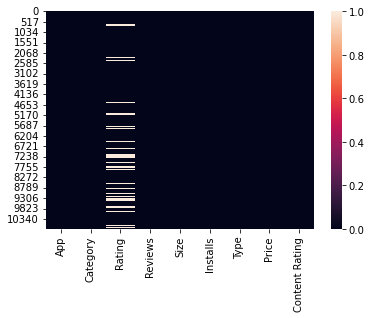

In [7]:
#visualization of null values in dataset
sb.heatmap(df.isnull())
plt.show()

In [8]:
#to check datatype
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [9]:
#how many records are there
df.shape

(10841, 9)

In [10]:
#to show only rows
df.shape[0]

10841

In [11]:
#find the % of null values of each columns on dataest
df.isnull().sum()/df.shape[0]*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
dtype: float64

In [12]:
#check the duplicate value in given datset
df.duplicated().sum()

485

In [13]:
#drop the duplicated values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

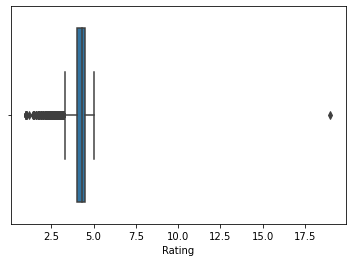

In [14]:
sb.boxplot(data=df,x="Rating")
plt.show()

In [15]:
df[df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [16]:
df.drop(10472,inplace=True)

In [17]:
#fill null values of rating columns
#first find the mean
m=df["Rating"].mean()
df["Rating"].fillna(m,inplace=True)
#again check null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
dtype: int64

In [18]:
#types of values in type column
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [19]:
df.sample(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10348,Santa Fe Sentry,HOUSE_AND_HOME,4.187885,0,5.3M,100+,Free,0,Everyone
6894,Best Western To Go,TRAVEL_AND_LOCAL,3.000000,2719,17M,"100,000+",Free,0,Teen
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.300000,56496,81M,"1,000,000+",Free,0,Teen
2373,5-Minute Clinical Consult,MEDICAL,4.100000,84,6.1M,"10,000+",Free,0,Everyone
2851,Beauty Makeup – Photo Makeover,PHOTOGRAPHY,4.300000,21730,19M,"1,000,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
8053,CX watcher,FAMILY,4.500000,4,30M,500+,Free,0,Everyone
1054,Nedbank Money,FINANCE,4.200000,6076,32M,"500,000+",Free,0,Everyone
10045,Get Over Your Ex,DATING,4.100000,10,11M,"5,000+",Free,0,Everyone
7262,Themes DAF CF 85,PERSONALIZATION,4.187885,3,14M,100+,Free,0,Teen


In [20]:
#how many 0 are there we find the frequency
df["Type"].value_counts()

Free    9589
Paid     765
Name: Type, dtype: int64

In [21]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [22]:
#now remove the nan values from type column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
dtype: int64

In [23]:
#mode= highest frequency from type column (i.e  free)
#to fill null values of type columns with free 
df["Type"].fillna("Free",inplace=True)

In [24]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [25]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [27]:
#reviews column showing object type but data is in numeric type
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [28]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [29]:
#to see non-numeric data in "Reviews" column
x=df["Reviews"]
c=0#initialize counter values
for index, value in enumerate(x):
    if not value.isnumeric():
        print(index," ",value)
        c=c+1
print("no of rows which having speical characters:",c)


no of rows which having speical characters: 0


In [30]:
#replace 0.3m with null values with nan
df["Reviews"].replace("3.0M",np.nan,inplace=True)


In [31]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [33]:
#change the datatype of "Reviews" column in to float dataype
df["Reviews"]=df["Reviews"].astype("float")

In [34]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [35]:
#fill null values of reviews columns
#first find the mean
m=df["Reviews"].mean()
df["Reviews"].fillna(m,inplace=True)
#again check null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [36]:
#replace 1,000+ with 0.3M in size x=column
df["Size"].replace("1,000+","3.0M",inplace=True)
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [37]:
#TO Check replacing value
df[df["Size"]=="3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
522,InterracialCupid - Interracial Dating App,DATING,3.400000,212.0,3.0M,"50,000+",Free,0,Mature 17+
722,English speaking texts,EDUCATION,4.400000,1619.0,3.0M,"1,000,000+",Free,0,Everyone
1586,Beautiful Design Birthday Cake,LIFESTYLE,4.300000,665.0,3.0M,"500,000+",Free,0,Everyone
1642,Neighborhoods & Apartments,LIFESTYLE,3.900000,2042.0,3.0M,"100,000+",Free,0,Everyone
3004,Mercato foot by Maxifoot,SPORTS,4.400000,697.0,3.0M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
9798,"ES File Explorer & Manager, Locker Xplorer 2018",TOOLS,3.500000,11.0,3.0M,"1,000+",Free,0,Everyone
10173,FA Part 1 & 2 Past Papers Solved Free – Offline,BOOKS_AND_REFERENCE,3.900000,46.0,3.0M,"5,000+",Free,0,Everyone
10227,Video Downloader for FB,TOOLS,4.300000,53.0,3.0M,"5,000+",Free,0,Everyone
10274,Latest Barcelona News 24h,NEWS_AND_MAGAZINES,4.500000,104.0,3.0M,"10,000+",Free,0,Everyone


In [38]:
# to remove unit M from size columns whose found "M"
df["Size"]=df["Size"].map(lambda X:X.rstrip("M"))#X.rtrip use for removing last values from original value

In [39]:
#converting all k values in to m
df["Size"]=df["Size"].map(lambda x:str(round((float(x.rstrip("k"))/1024),1)) if x[-1]=="k" else x)

In [40]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

In [41]:
len(df[df["Size"]=="Varies with device"])

1526

In [42]:
#replace 'Varies with device' with null values with nan
df["Size"].replace('Varies with device',np.nan,inplace=True)

In [43]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1526
Installs             0
Type                 0
Price                0
Content Rating       0
dtype: int64

In [44]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [45]:
#change the datatype of "Reviews" column in to float dataype
df["Size"]=df["Size"].astype("float")

In [46]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [47]:
#fill null values of reviews columns
#first find the mean
m=df["Size"].mean()
df["Size"].fillna(m,inplace=True)
#again check null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

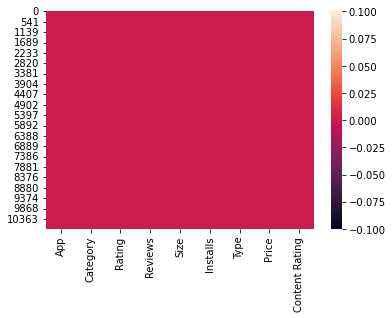

In [48]:
#visualization of null values in dataset
sb.heatmap(df.isnull())
plt.show()

In [49]:
#find the % of null values of each columns on dataest
df.isnull().sum()/df.shape[0]*100

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
dtype: float64

In [50]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone


In [51]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [52]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [53]:
# to remove + from instals columns
df["Installs"]=df["Installs"].map(lambda X:X.rstrip("+"))

In [54]:
df["Installs"].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [55]:
# to remove + from instals columns
df["Installs"]=df["Installs"].map(lambda X:"".join(X.split(",")))
df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [56]:
#change the datatype of "Installs" column in to int dataype
df["Installs"]=df["Installs"].astype("int")

In [57]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
dtype: object

In [58]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [59]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [60]:
# to remove $ from instals columns
df["Price"]=df["Price"].map(lambda X:X.lstrip("$"))

In [61]:
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [62]:
#change the datatype of "Installs" column in to int dataype
df["Price"]=df["Price"].astype("float")
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
dtype: object

In [63]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [64]:
df["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [65]:
#separate dataset  df in 2 parts :1. df_cat ,2. df_num
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["float","int32"])

In [66]:
df_num.dtypes

Rating      float64
Reviews     float64
Size        float64
Installs      int32
Price       float64
dtype: object

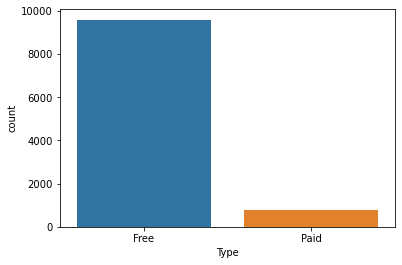

In [67]:
sb.countplot(data=df_cat,x="Type")
plt.show()

In [68]:
df_cat.dtypes

App               object
Category          object
Type              object
Content Rating    object
dtype: object

In [69]:
#applying LabelEncoder on df_cat
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
for col in column:
    #create object of LabelEncoder class
    le= LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
    

In [70]:
df_cat.head()

,App,Category,Type,Content Rating
0,6962,0,0,1
1,2632,0,0,1
2,8656,0,0,1
3,7827,0,0,4
4,7022,0,0,1


In [71]:
df_num.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19.0,10000,0.0
1,3.9,967.0,14.0,500000,0.0
2,4.7,87510.0,8.7,5000000,0.0
3,4.5,215644.0,25.0,50000000,0.0
4,4.3,967.0,2.8,100000,0.0


Skewness of  Rating   -1.9678339936635603
Skewness of  Reviews   17.46564932469459
Skewness of  Size   1.699788250679932
Skewness of  Installs   10.12570571599536
Skewness of  Price   23.322119741297936


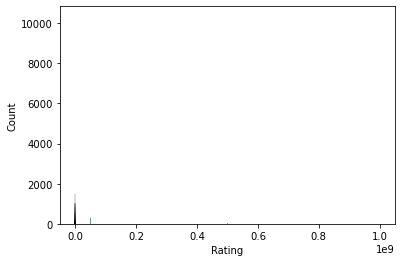

In [72]:
#checking skewness of each columns
column=df_num.columns
for col in column:
    print("Skewness of ",col," ",df_num[col].skew())
    sb.histplot(df_num[col])
plt.show()

In [73]:
#merge both dataframe df_cat and df_num
#now hold new dataframe
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()
#concate() inbuilt| method of pandas

,App,Category,Type,Content Rating,Rating,Reviews,Size,Installs,Price
0,6962,0,0,1,4.1,159.0,19.0,10000,0.0
1,2632,0,0,1,3.9,967.0,14.0,500000,0.0
2,8656,0,0,1,4.7,87510.0,8.7,5000000,0.0
3,7827,0,0,4,4.5,215644.0,25.0,50000000,0.0
4,7022,0,0,1,4.3,967.0,2.8,100000,0.0


In [74]:
#apply standardscaler on input coumns x
from sklearn.preprocessing import StandardScaler
#create an object for standarad scaler class
ss=StandardScaler()
df_num=ss.fit_transform(df_num)#convert into numpy 2Darray
df_num



array([[-1.81565244e-01, -1.50470443e-01, -1.09974421e-01,
        -1.76320559e-01, -6.33315234e-02],
       [-5.94752244e-01, -1.50170840e-01, -3.50196730e-01,
        -1.70214139e-01, -6.33315234e-02],
       [ 1.05799576e+00, -1.18081089e-01, -6.04832377e-01,
        -1.14134765e-01, -6.33315234e-02],
       ...,
       [ 1.28444322e-14, -1.50528287e-01, -5.66396808e-01,
        -1.76432718e-01, -6.33315234e-02],
       [ 6.44808756e-01, -1.50487128e-01, -4.77927007e-15,
        -1.76432718e-01, -6.33315234e-02],
       [ 6.44808756e-01, -2.83897393e-03, -1.09974421e-01,
        -5.18243507e-02, -6.33315234e-02]])

In [ ]:
#now we can give data to the machine to train and test with different algorithms